In [1]:
%env CUDA_VISIBLE_DEVICES = 0
%config Completer.use_jedi = False

import os
from util import import_shap_scores, import_tfmodisco_results, import_peak_table, import_profiles
from util import pfm_to_pwm, trim_motif_by_ic
from util import figure_to_vdom_image
from tomtom import match_motifs_to_database
import viz_sequence
import numpy as np
import h5py
import pandas as pd
import sklearn.cluster
import scipy.cluster.hierarchy
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import vdom.helpers as vdomh
from IPython.display import display
import tqdm
tqdm.tqdm_notebook()

from importlib import reload
import tfmodisco_hit_scoring
from datetime import datetime

env: CUDA_VISIBLE_DEVICES=0


/tmp/ipykernel_333619/1279542980.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm.tqdm_notebook()


0it [00:00, ?it/s]

## Define constants and paths

In [2]:
# fosl2 chip-seq
TFM_SHAP_PATH = '/home/katie/bp_repo/pipeline_outputs/fosl2_chipseq_oct10/shap_scores'
TFM_TFM_PATH =  '/home/katie/bp_repo/pipeline_outputs/fosl2_chipseq_oct10/tfmodisco_results'
TFM_PEAKS_PATH = '/home/katie/bp_repo/research/data/chip-seq/FOSL2/FOSL2.bed'

os.environ['TFM_SHAP_PATH'] = TFM_SHAP_PATH
os.environ['TFM_TFM_PATH'] = TFM_TFM_PATH
os.environ['TFM_PEAKS_PATH'] = TFM_PEAKS_PATH

# Define parameters/fetch arguments
shap_scores_path = os.environ['TFM_SHAP_PATH']
tfm_results_path = os.environ['TFM_TFM_PATH']
peak_bed_paths = [os.environ['TFM_PEAKS_PATH']]

print("DeepSHAP scores path: %s" % shap_scores_path)
print("TF-MoDISco results path: %s" % tfm_results_path)
print("Peaks path: %s" % peak_bed_paths[0])

# Define constants
input_length, profile_length = 2114, 1000
shap_score_center_size = 400
profile_display_center_size = 400
hyp_score_key = "hyp_scores"
task_index = None

DeepSHAP scores path: /home/katie/bp_repo/pipeline_outputs/fosl2_chipseq_oct10/shap_scores
TF-MoDISco results path: /home/katie/bp_repo/pipeline_outputs/fosl2_chipseq_oct10/tfmodisco_results
Peaks path: /home/katie/bp_repo/research/data/chip-seq/FOSL2/FOSL2.bed


Importing DeepSHAP scores and TF-MoDISco results...



Importing SHAP scores: 100%|████████████████████| 67/67 [00:01<00:00, 43.19it/s]


Matching up DeepSHAP coordinates and peak coordinates...
Preparing the hit scorer...
Getting trimmed patterns, subclustering them
Trimming the patterns to the target length
Apply subclustering


[Parallel(n_jobs=80)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=80)]: Done  40 tasks      | elapsed:    1.7s
[Parallel(n_jobs=80)]: Done 290 tasks      | elapsed:    2.2s
[Parallel(n_jobs=80)]: Done 720 tasks      | elapsed:    2.8s
[Parallel(n_jobs=80)]: Done 1620 tasks      | elapsed:    3.9s
[Parallel(n_jobs=80)]: Done 2720 tasks      | elapsed:    5.3s
[Parallel(n_jobs=80)]: Done 4020 tasks      | elapsed:    7.1s
[Parallel(n_jobs=80)]: Done 5470 out of 5629 | elapsed:    8.9s remaining:    0.3s
[Parallel(n_jobs=80)]: Done 5629 out of 5629 | elapsed:    9.0s finished
/home/katie/anaconda/envs/modi2/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squa

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5629 samples in 0.030s...
[t-SNE] Computed neighbors for 5629 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5629
[t-SNE] Computed conditional probabilities for sample 2000 / 5629
[t-SNE] Computed conditional probabilities for sample 3000 / 5629
[t-SNE] Computed conditional probabilities for sample 4000 / 5629
[t-SNE] Computed conditional probabilities for sample 5000 / 5629
[t-SNE] Computed conditional probabilities for sample 5629 / 5629
[t-SNE] Mean sigma: 0.177726
[t-SNE] Computed conditional probabilities in 0.198s
[t-SNE] Iteration 50: error = 82.9987946, gradient norm = 0.0000016 (50 iterations in 0.686s)
[t-SNE] Iteration 100: error = 82.9987717, gradient norm = 0.0001013 (50 iterations in 0.624s)
[t-SNE] Iteration 150: error = 82.9053497, gradient norm = 0.0032979 (50 iterations in 0.652s)
[t-SNE] Iteration 200: error = 82.4353333, gradient norm = 0.0001266 (50 iterations in 0.588s)
[

[Parallel(n_jobs=80)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=80)]: Done  44 out of  50 | elapsed:   11.8s remaining:    1.6s


Quality: 0.5146911783369377
Quality: 0.5185825404874348
Quality: 0.5189832437522656
Quality: 0.5197071106443812
Quality: 0.5208747613401683


[Parallel(n_jobs=80)]: Done  50 out of  50 | elapsed:   13.8s finished


Got subclusters: Counter({0: 1151, 1: 1001, 2: 974, 3: 898, 4: 832, 5: 667, 6: 51, 7: 26, 8: 18, 9: 11})


[Parallel(n_jobs=80)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=80)]: Done  62 out of  73 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=80)]: Done  73 out of  73 | elapsed:    0.0s finished


[t-SNE] Computing 72 nearest neighbors...
[t-SNE] Indexed 73 samples in 0.001s...
[t-SNE] Computed neighbors for 73 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 73 / 73
[t-SNE] Mean sigma: 0.501002
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 49.5214920, gradient norm = 0.5278010 (50 iterations in 0.021s)
[t-SNE] Iteration 100: error = 49.5216103, gradient norm = 0.6063448 (50 iterations in 0.018s)
[t-SNE] Iteration 150: error = 49.8675613, gradient norm = 0.5563790 (50 iterations in 0.018s)
[t-SNE] Iteration 200: error = 50.1434746, gradient norm = 0.4048069 (50 iterations in 0.018s)
[t-SNE] Iteration 250: error = 45.0502319, gradient norm = 0.5010481 (50 iterations in 0.018s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.050232
[t-SNE] Iteration 300: error = 0.7415750, gradient norm = 0.0030667 (50 iterations in 0.018s)
[t-SNE] Iteration 350: error = 0.5872467, gradient norm = 0.0025552 (50 i

[Parallel(n_jobs=80)]: Using backend LokyBackend with 80 concurrent workers.


Quality: 0.23841826418087406
Got subclusters: Counter({0: 31, 1: 26, 2: 16})
Preparing seqlet scorer
Pattern length (and hence target seqlet size) is 25
Subsampling subpattern 0
Subsampling subpattern 1
Subsampling subpattern 2
Subsampling subpattern 3
Subsampling subpattern 4
Subsampling subpattern 5
Prepare seqlet scorer
Computing best alignments for all motifseqlets
Launching nearest neighbors affmat calculation job
MEMORY 5.848526848


[Parallel(n_jobs=80)]: Done  44 out of  50 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=80)]: Done  50 out of  50 | elapsed:    0.2s finished


Parallel runs completed
MEMORY 5.85220096
Job completed in: 0.47 s
MEMORY 5.85334784
Launching nearest neighbors affmat calculation job
MEMORY 5.853986816
Parallel runs completed
MEMORY 5.862100992
Job completed in: 0.46 s
MEMORY 5.862068224
On seqlets 0 to 779 out of 779


100%|███████████████████████████████████████████| 13/13 [00:06<00:00,  2.07it/s]


Accuracy: 1.0
Accuracy: 1.0
Mapping affinity to distmat
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
Computing density-adapted nn affmat
Beginning preprocessing + Leiden
initclusters length: 779
Affmat shape: 779


[Parallel(n_jobs=80)]: Using backend LokyBackend with 80 concurrent workers.


Quality: 0.10819003339640808
Quality: 0.10850088332212095


[Parallel(n_jobs=80)]: Done  44 out of  50 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=80)]: Done  50 out of  50 | elapsed:    1.0s finished


Number of reclustered idxs: 5
{(4, 0), (0, 0), (1, 1), (2, 0), (3, 0)}
Preparing modularity scorer
Accuracy: 0.9563543003851092
Computing windowed sums on original
Generating null dist
peak(mu)= 0.0026692801835379205
Computing threshold
Subsampling!
For increasing = True , the minimum IR precision was 0.3273063727617407 occurring at 4.568710210151039e-08 implying a frac_neg of 0.4865608346930467
To be conservative, adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.4119079233759387 occurring at -5.404581315815449e-08 implying a frac_neg of 0.7004139993527773
To be conservative, adjusted frac neg is 0.95
Thresholds from null dist were -0.0993662653490901  and  0.2703489763662219 with frac passing 0.057309
Final raw thresholds are -0.0993662653490901  and  0.2703489763662219
Final transformed thresholds are -0.8674532386757442  and  0.9531135542246333


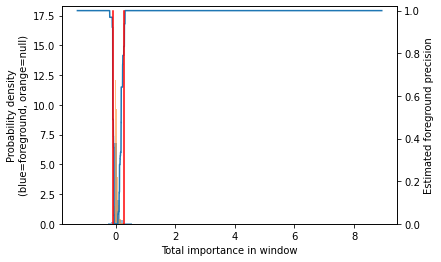

Only returning positive coords!
Got 64075 coords
Starting hit scoring...
	Scoring batch 1/33
Computing windowed sums on original
Only returning positive coords!
Got 3814 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.313578496
Parallel runs completed
MEMORY 6.320467968
Job completed in: 8.2 s
MEMORY 6.320549888
Launching nearest neighbors affmat calculation job
MEMORY 6.320480256
Parallel runs completed
MEMORY 6.325956608
Job completed in: 8.19 s
MEMORY 6.325915648
On seqlets 0 to 3814 out of 3814


100%|███████████████████████████████████████████| 13/13 [00:11<00:00,  1.17it/s]


Launching nearest neighbors affmat calculation job
MEMORY 6.34298368
Parallel runs completed
MEMORY 6.345613312
Job completed in: 3.84 s
MEMORY 6.345015296
Launching nearest neighbors affmat calculation job
MEMORY 6.34417152
Parallel runs completed
MEMORY 6.34585088
Job completed in: 3.78 s
MEMORY 6.345736192
On seqlets 0 to 3814 out of 3814


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  6.79it/s]


Removed 0 duplicates
	Scoring batch 2/33
Computing windowed sums on original
Only returning positive coords!
Got 3065 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.357008384
Parallel runs completed
MEMORY 6.358003712
Job completed in: 6.69 s
MEMORY 6.35764736
Launching nearest neighbors affmat calculation job
MEMORY 6.357200896
Parallel runs completed
MEMORY 6.361903104
Job completed in: 6.75 s
MEMORY 6.361821184
On seqlets 0 to 3065 out of 3065


100%|███████████████████████████████████████████| 13/13 [00:14<00:00,  1.08s/it]


Launching nearest neighbors affmat calculation job
MEMORY 6.370177024
Parallel runs completed
MEMORY 6.371885056
Job completed in: 3.18 s
MEMORY 6.371729408
Launching nearest neighbors affmat calculation job
MEMORY 6.37124608
Parallel runs completed
MEMORY 6.371893248
Job completed in: 3.07 s
MEMORY 6.37177856
On seqlets 0 to 3065 out of 3065


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  8.13it/s]


Removed 0 duplicates
	Scoring batch 3/33
Computing windowed sums on original
Only returning positive coords!
Got 2861 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.370910208
Parallel runs completed
MEMORY 6.376607744
Job completed in: 6.22 s
MEMORY 6.376484864
Launching nearest neighbors affmat calculation job
MEMORY 6.376046592
Parallel runs completed
MEMORY 6.3806464
Job completed in: 6.19 s
MEMORY 6.380568576
On seqlets 0 to 2861 out of 2861


100%|███████████████████████████████████████████| 13/13 [00:12<00:00,  1.06it/s]


Launching nearest neighbors affmat calculation job
MEMORY 6.380060672
Parallel runs completed
MEMORY 6.380691456
Job completed in: 2.98 s
MEMORY 6.380634112
Launching nearest neighbors affmat calculation job
MEMORY 6.380060672
Parallel runs completed
MEMORY 6.381723648
Job completed in: 2.82 s
MEMORY 6.381625344
On seqlets 0 to 2861 out of 2861


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  8.93it/s]


Removed 1 duplicates
	Scoring batch 4/33
Computing windowed sums on original
Only returning positive coords!
Got 2622 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.382845952
Parallel runs completed
MEMORY 6.386868224
Job completed in: 5.69 s
MEMORY 6.3867904
Launching nearest neighbors affmat calculation job
MEMORY 6.3863808
Parallel runs completed
MEMORY 6.39094784
Job completed in: 5.85 s
MEMORY 6.390882304
On seqlets 0 to 2622 out of 2622


100%|███████████████████████████████████████████| 13/13 [00:09<00:00,  1.31it/s]


Launching nearest neighbors affmat calculation job
MEMORY 6.39029248
Parallel runs completed
MEMORY 6.392025088
Job completed in: 2.7 s
MEMORY 6.391934976
Launching nearest neighbors affmat calculation job
MEMORY 6.391369728
Parallel runs completed
MEMORY 6.3931392
Job completed in: 2.71 s
MEMORY 6.392991744
On seqlets 0 to 2622 out of 2622


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  9.73it/s]


Removed 1 duplicates
	Scoring batch 5/33
Computing windowed sums on original
Only returning positive coords!
Got 2591 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.393278464
Parallel runs completed
MEMORY 6.398193664
Job completed in: 5.69 s
MEMORY 6.398087168
Launching nearest neighbors affmat calculation job
MEMORY 6.397538304
Parallel runs completed
MEMORY 6.402072576
Job completed in: 5.72 s
MEMORY 6.4019456
On seqlets 0 to 2591 out of 2591


100%|███████████████████████████████████████████| 13/13 [00:09<00:00,  1.33it/s]


Launching nearest neighbors affmat calculation job
MEMORY 6.40145408
Parallel runs completed
MEMORY 6.402056192
Job completed in: 2.59 s
MEMORY 6.401978368
Launching nearest neighbors affmat calculation job
MEMORY 6.40145408
Parallel runs completed
MEMORY 6.40210944
Job completed in: 2.71 s
MEMORY 6.40206848
On seqlets 0 to 2591 out of 2591


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  9.94it/s]


Removed 2 duplicates
	Scoring batch 6/33
Computing windowed sums on original
Only returning positive coords!
Got 2440 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.402486272
Parallel runs completed
MEMORY 6.407921664
Job completed in: 6.25 s
MEMORY 6.40774144
Launching nearest neighbors affmat calculation job
MEMORY 6.407380992
Parallel runs completed
MEMORY 6.408044544
Job completed in: 5.32 s
MEMORY 6.40796672
On seqlets 0 to 2440 out of 2440


100%|███████████████████████████████████████████| 13/13 [00:08<00:00,  1.59it/s]


Launching nearest neighbors affmat calculation job
MEMORY 6.407544832
Parallel runs completed
MEMORY 6.409138176
Job completed in: 2.27 s
MEMORY 6.40903168
Launching nearest neighbors affmat calculation job
MEMORY 6.408482816
Parallel runs completed
MEMORY 6.410108928
Job completed in: 2.37 s
MEMORY 6.409867264
On seqlets 0 to 2440 out of 2440


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  8.40it/s]


Removed 0 duplicates
	Scoring batch 7/33
Computing windowed sums on original
Only returning positive coords!
Got 2478 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.410801152
Parallel runs completed
MEMORY 6.416105472
Job completed in: 5.43 s
MEMORY 6.416039936
Launching nearest neighbors affmat calculation job
MEMORY 6.415548416
Parallel runs completed
MEMORY 6.42000896
Job completed in: 5.44 s
MEMORY 6.419955712
On seqlets 0 to 2478 out of 2478


100%|███████████████████████████████████████████| 13/13 [00:08<00:00,  1.49it/s]


Launching nearest neighbors affmat calculation job
MEMORY 6.419918848
Parallel runs completed
MEMORY 6.420570112
Job completed in: 2.52 s
MEMORY 6.420529152
Launching nearest neighbors affmat calculation job
MEMORY 6.419922944
Parallel runs completed
MEMORY 6.42164736
Job completed in: 2.53 s
MEMORY 6.421499904
On seqlets 0 to 2478 out of 2478


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 10.71it/s]


Removed 0 duplicates
	Scoring batch 8/33
Computing windowed sums on original
Only returning positive coords!
Got 2241 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.422306816
Parallel runs completed
MEMORY 6.42336768
Job completed in: 4.99 s
MEMORY 6.423302144
Launching nearest neighbors affmat calculation job
MEMORY 6.422908928
Parallel runs completed
MEMORY 6.428475392
Job completed in: 5.02 s
MEMORY 6.428360704
On seqlets 0 to 2241 out of 2241


100%|███████████████████████████████████████████| 13/13 [00:11<00:00,  1.16it/s]


Launching nearest neighbors affmat calculation job
MEMORY 6.42781184
Parallel runs completed
MEMORY 6.429159424
Job completed in: 2.45 s
MEMORY 6.429077504
Launching nearest neighbors affmat calculation job
MEMORY 6.428553216
Parallel runs completed
MEMORY 6.429241344
Job completed in: 2.34 s
MEMORY 6.429184
On seqlets 0 to 2241 out of 2241


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 11.75it/s]


Removed 0 duplicates
	Scoring batch 9/33
Computing windowed sums on original
Only returning positive coords!
Got 2277 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.429990912
Parallel runs completed
MEMORY 6.430838784
Job completed in: 5.03 s
MEMORY 6.43072
Launching nearest neighbors affmat calculation job
MEMORY 6.430154752
Parallel runs completed
MEMORY 6.431387648
Job completed in: 5.02 s
MEMORY 6.431281152
On seqlets 0 to 2277 out of 2277


100%|███████████████████████████████████████████| 13/13 [00:11<00:00,  1.14it/s]


Launching nearest neighbors affmat calculation job
MEMORY 6.430777344
Parallel runs completed
MEMORY 6.432370688
Job completed in: 2.44 s
MEMORY 6.432280576
Launching nearest neighbors affmat calculation job
MEMORY 6.431707136
Parallel runs completed
MEMORY 6.432313344
Job completed in: 2.29 s
MEMORY 6.432247808
On seqlets 0 to 2277 out of 2277


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 11.49it/s]


Removed 0 duplicates
	Scoring batch 10/33
Computing windowed sums on original
Only returning positive coords!
Got 2244 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.432985088
Parallel runs completed
MEMORY 6.436253696
Job completed in: 4.97 s
MEMORY 6.436155392
Launching nearest neighbors affmat calculation job
MEMORY 6.435975168
Parallel runs completed
MEMORY 6.44042752
Job completed in: 4.96 s
MEMORY 6.440349696
On seqlets 0 to 2244 out of 2244


100%|███████████████████████████████████████████| 13/13 [00:11<00:00,  1.15it/s]


Launching nearest neighbors affmat calculation job
MEMORY 6.439686144
Parallel runs completed
MEMORY 6.441275392
Job completed in: 2.32 s
MEMORY 6.4411648
Launching nearest neighbors affmat calculation job
MEMORY 6.4406528
Parallel runs completed
MEMORY 6.442307584
Job completed in: 2.29 s
MEMORY 6.4421888
On seqlets 0 to 2244 out of 2244


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 11.61it/s]


Removed 1 duplicates
	Scoring batch 11/33
Computing windowed sums on original
Only returning positive coords!
Got 2263 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.442876928
Parallel runs completed
MEMORY 6.447284224
Job completed in: 4.99 s
MEMORY 6.447161344
Launching nearest neighbors affmat calculation job
MEMORY 6.446751744
Parallel runs completed
MEMORY 6.450290688
Job completed in: 4.96 s
MEMORY 6.450188288
On seqlets 0 to 2263 out of 2263


100%|███████████████████████████████████████████| 13/13 [00:10<00:00,  1.23it/s]


Launching nearest neighbors affmat calculation job
MEMORY 6.449618944
Parallel runs completed
MEMORY 6.450282496
Job completed in: 2.36 s
MEMORY 6.450151424
Launching nearest neighbors affmat calculation job
MEMORY 6.449635328
Parallel runs completed
MEMORY 6.450241536
Job completed in: 2.41 s
MEMORY 6.450159616
On seqlets 0 to 2263 out of 2263


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 11.65it/s]


Removed 0 duplicates
	Scoring batch 12/33
Computing windowed sums on original
Only returning positive coords!
Got 2075 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.450929664
Parallel runs completed
MEMORY 6.451605504
Job completed in: 4.66 s
MEMORY 6.451499008
Launching nearest neighbors affmat calculation job
MEMORY 6.451122176
Parallel runs completed
MEMORY 6.456602624
Job completed in: 4.63 s
MEMORY 6.456520704
On seqlets 0 to 2075 out of 2075


100%|███████████████████████████████████████████| 13/13 [00:09<00:00,  1.37it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.455963648


Parallel runs completed
MEMORY 6.456651776
Job completed in: 2.15 s
MEMORY 6.456573952
Launching nearest neighbors affmat calculation job
MEMORY 6.456242176
Parallel runs completed
MEMORY 6.4567296
Job completed in: 2.13 s
MEMORY 6.45660672
On seqlets 0 to 2075 out of 2075


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 12.65it/s]


Removed 0 duplicates
	Scoring batch 13/33
Computing windowed sums on original
Only returning positive coords!
Got 2106 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.456963072
Parallel runs completed
MEMORY 6.4585728
Job completed in: 4.73 s
MEMORY 6.458564608
Launching nearest neighbors affmat calculation job
MEMORY 6.458175488
Parallel runs completed
MEMORY 6.462353408
Job completed in: 4.6 s
MEMORY 6.462271488
On seqlets 0 to 2106 out of 2106


100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.76it/s]


Launching nearest neighbors affmat calculation job
MEMORY 6.46170624
Parallel runs completed
MEMORY 6.46326272
Job completed in: 2.08 s
MEMORY 6.463176704
Launching nearest neighbors affmat calculation job
MEMORY 6.462640128
Parallel runs completed
MEMORY 6.463320064
Job completed in: 2.21 s
MEMORY 6.463238144
On seqlets 0 to 2106 out of 2106


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 12.42it/s]


Removed 0 duplicates
	Scoring batch 14/33
Computing windowed sums on original
Only returning positive coords!
Got 1964 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.472241152
Parallel runs completed
MEMORY 6.473232384
Job completed in: 4.4 s
MEMORY 6.473109504
Launching nearest neighbors affmat calculation job
MEMORY 6.472732672
Parallel runs completed
MEMORY 6.475747328
Job completed in: 4.35 s
MEMORY 6.475665408
On seqlets 0 to 1964 out of 1964


100%|███████████████████████████████████████████| 13/13 [00:08<00:00,  1.51it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.475104256


Parallel runs completed
MEMORY 6.475808768
Job completed in: 2.06 s
MEMORY 6.47573504
Launching nearest neighbors affmat calculation job
MEMORY 6.475137024
Parallel runs completed
MEMORY 6.475767808
Job completed in: 2.07 s
MEMORY 6.475636736
On seqlets 0 to 1964 out of 1964


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 13.30it/s]


Removed 1 duplicates
	Scoring batch 15/33
Computing windowed sums on original
Only returning positive coords!
Got 2011 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.475370496
Parallel runs completed
MEMORY 6.480965632
Job completed in: 4.52 s
MEMORY 6.480891904
Launching nearest neighbors affmat calculation job
MEMORY 6.48042496
Parallel runs completed
MEMORY 6.480695296
Job completed in: 4.54 s
MEMORY 6.480613376
On seqlets 0 to 2011 out of 2011


100%|███████████████████████████████████████████| 13/13 [00:09<00:00,  1.44it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.480048128


Parallel runs completed
MEMORY 6.48169472
Job completed in: 2.09 s
MEMORY 6.481580032
Launching nearest neighbors affmat calculation job
MEMORY 6.48105984
Parallel runs completed
MEMORY 6.48165376
Job completed in: 2.06 s
MEMORY 6.481559552
On seqlets 0 to 2011 out of 2011


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 12.88it/s]


Removed 0 duplicates
	Scoring batch 16/33
Computing windowed sums on original
Only returning positive coords!
Got 1858 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.489042944
Parallel runs completed
MEMORY 6.489726976
Job completed in: 4.17 s
MEMORY 6.489677824
Launching nearest neighbors affmat calculation job
MEMORY 6.489268224
Parallel runs completed
MEMORY 6.4940032
Job completed in: 4.17 s
MEMORY 6.493945856
On seqlets 0 to 1858 out of 1858


100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.71it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.49332736


Parallel runs completed
MEMORY 6.494961664
Job completed in: 1.96 s
MEMORY 6.494879744
Launching nearest neighbors affmat calculation job
MEMORY 6.494318592
Parallel runs completed
MEMORY 6.494990336
Job completed in: 2.03 s
MEMORY 6.494916608
On seqlets 0 to 1858 out of 1858


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 14.06it/s]


Removed 0 duplicates
	Scoring batch 17/33
Computing windowed sums on original
Only returning positive coords!
Got 1904 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.494318592
Parallel runs completed
MEMORY 6.495186944
Job completed in: 4.28 s
MEMORY 6.495121408
Launching nearest neighbors affmat calculation job
MEMORY 6.494654464
Parallel runs completed
MEMORY 6.499192832
Job completed in: 4.3 s
MEMORY 6.499110912
On seqlets 0 to 1904 out of 1904


100%|███████████████████████████████████████████| 13/13 [00:08<00:00,  1.62it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.498553856


Parallel runs completed
MEMORY 6.499192832
Job completed in: 2.11 s
MEMORY 6.499078144
Launching nearest neighbors affmat calculation job
MEMORY 6.498701312
Parallel runs completed
MEMORY 6.499274752
Job completed in: 2.04 s
MEMORY 6.49918464
On seqlets 0 to 1904 out of 1904


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 13.62it/s]


Removed 1 duplicates
	Scoring batch 18/33
Computing windowed sums on original
Only returning positive coords!
Got 1813 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.498553856
Parallel runs completed
MEMORY 6.49947136
Job completed in: 4.04 s
MEMORY 6.499405824
Launching nearest neighbors affmat calculation job
MEMORY 6.49897984
Parallel runs completed
MEMORY 6.500569088
Job completed in: 4.14 s
MEMORY 6.500429824
On seqlets 0 to 1813 out of 1813


100%|███████████████████████████████████████████| 13/13 [00:05<00:00,  2.23it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.499913728


Parallel runs completed
MEMORY 6.500564992
Job completed in: 1.9 s
MEMORY 6.5004544
Launching nearest neighbors affmat calculation job
MEMORY 6.499991552
Parallel runs completed
MEMORY 6.501523456
Job completed in: 1.84 s
MEMORY 6.50141696
On seqlets 0 to 1813 out of 1813


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 14.47it/s]


Removed 0 duplicates
	Scoring batch 19/33
Computing windowed sums on original
Only returning positive coords!
Got 1712 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.500872192
Parallel runs completed
MEMORY 6.5053696
Job completed in: 3.87 s
MEMORY 6.505254912
Launching nearest neighbors affmat calculation job
MEMORY 6.505058304
Parallel runs completed
MEMORY 6.509051904
Job completed in: 3.74 s
MEMORY 6.5089536
On seqlets 0 to 1712 out of 1712


100%|███████████████████████████████████████████| 13/13 [00:08<00:00,  1.53it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.508417024


Parallel runs completed
MEMORY 6.509043712
Job completed in: 1.84 s
MEMORY 6.508941312
Launching nearest neighbors affmat calculation job
MEMORY 6.50852352
Parallel runs completed
MEMORY 6.509072384
Job completed in: 1.83 s
MEMORY 6.5089536
On seqlets 0 to 1712 out of 1712


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 15.41it/s]


Removed 0 duplicates
	Scoring batch 20/33
Computing windowed sums on original
Only returning positive coords!
Got 1712 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.508417024
Parallel runs completed
MEMORY 6.509223936
Job completed in: 3.63 s
MEMORY 6.509101056
Launching nearest neighbors affmat calculation job
MEMORY 6.508552192
Parallel runs completed
MEMORY 6.509223936
Job completed in: 3.75 s
MEMORY 6.509142016
On seqlets 0 to 1712 out of 1712


100%|███████████████████████████████████████████| 13/13 [00:10<00:00,  1.23it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.508527616


Parallel runs completed
MEMORY 6.50919936
Job completed in: 1.84 s
MEMORY 6.50911744
Launching nearest neighbors affmat calculation job
MEMORY 6.508679168
Parallel runs completed
MEMORY 6.509809664
Job completed in: 1.93 s
MEMORY 6.509727744
On seqlets 0 to 1712 out of 1712


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 15.43it/s]


Removed 1 duplicates
	Scoring batch 21/33
Computing windowed sums on original
Only returning positive coords!
Got 1639 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.509113344
Parallel runs completed
MEMORY 6.509830144
Job completed in: 3.79 s
MEMORY 6.50973184
Launching nearest neighbors affmat calculation job
MEMORY 6.509379584
Parallel runs completed
MEMORY 6.513115136
Job completed in: 3.71 s
MEMORY 6.513025024
On seqlets 0 to 1639 out of 1639


100%|███████████████████████████████████████████| 13/13 [00:10<00:00,  1.27it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.512472064


Parallel runs completed
MEMORY 6.51403264
Job completed in: 1.79 s
MEMORY 6.51390976
Launching nearest neighbors affmat calculation job
MEMORY 6.513475584
Parallel runs completed
MEMORY 6.514139136
Job completed in: 1.81 s
MEMORY 6.51390976
On seqlets 0 to 1639 out of 1639


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 16.31it/s]


Removed 0 duplicates
	Scoring batch 22/33
Computing windowed sums on original
Only returning positive coords!
Got 1609 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.513393664
Parallel runs completed
MEMORY 6.514839552
Job completed in: 3.68 s
MEMORY 6.514741248
Launching nearest neighbors affmat calculation job
MEMORY 6.514364416
Parallel runs completed
MEMORY 6.515011584
Job completed in: 3.65 s
MEMORY 6.514929664
On seqlets 0 to 1609 out of 1609


100%|███████████████████████████████████████████| 13/13 [00:09<00:00,  1.34it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.514356224


Parallel runs completed
MEMORY 6.5159168
Job completed in: 1.75 s
MEMORY 6.515781632
Launching nearest neighbors affmat calculation job
MEMORY 6.515331072
Parallel runs completed
MEMORY 6.515970048
Job completed in: 1.8 s
MEMORY 6.515871744
On seqlets 0 to 1609 out of 1609


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 16.60it/s]


Removed 0 duplicates
	Scoring batch 23/33
Computing windowed sums on original
Only returning positive coords!
Got 1596 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.51524096
Parallel runs completed
MEMORY 6.51618304
Job completed in: 3.68 s
MEMORY 6.51610112
Launching nearest neighbors affmat calculation job
MEMORY 6.51569152
Parallel runs completed
MEMORY 6.519414784
Job completed in: 3.62 s
MEMORY 6.51935744
On seqlets 0 to 1596 out of 1596


100%|███████████████████████████████████████████| 13/13 [00:08<00:00,  1.58it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.518747136


Parallel runs completed
MEMORY 6.519394304
Job completed in: 1.76 s
MEMORY 6.519263232
Launching nearest neighbors affmat calculation job
MEMORY 6.51892736
Parallel runs completed
MEMORY 6.519566336
Job completed in: 1.79 s
MEMORY 6.519279616
On seqlets 0 to 1596 out of 1596


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 17.19it/s]


Removed 0 duplicates
	Scoring batch 24/33
Computing windowed sums on original
Only returning positive coords!
Got 1558 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.518747136
Parallel runs completed
MEMORY 6.522150912
Job completed in: 3.5 s
MEMORY 6.522073088
Launching nearest neighbors affmat calculation job
MEMORY 6.521786368
Parallel runs completed
MEMORY 6.52222464
Job completed in: 3.61 s
MEMORY 6.522134528
On seqlets 0 to 1558 out of 1558


100%|███████████████████████████████████████████| 13/13 [00:08<00:00,  1.61it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.52156928


Parallel runs completed
MEMORY 6.522191872
Job completed in: 1.71 s
MEMORY 6.522085376
Launching nearest neighbors affmat calculation job
MEMORY 6.521741312
Parallel runs completed
MEMORY 6.523318272
Job completed in: 1.7 s
MEMORY 6.523142144
On seqlets 0 to 1558 out of 1558


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 17.06it/s]


Removed 0 duplicates
	Scoring batch 25/33
Computing windowed sums on original
Only returning positive coords!
Got 1436 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.52253184
Parallel runs completed
MEMORY 6.526418944
Job completed in: 3.26 s
MEMORY 6.5263616
Launching nearest neighbors affmat calculation job
MEMORY 6.526050304
Parallel runs completed
MEMORY 6.526435328
Job completed in: 3.37 s
MEMORY 6.526369792
On seqlets 0 to 1436 out of 1436


100%|███████████████████████████████████████████| 13/13 [00:08<00:00,  1.56it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.5257472


Parallel runs completed
MEMORY 6.526373888
Job completed in: 1.6 s
MEMORY 6.526296064
Launching nearest neighbors affmat calculation job
MEMORY 6.526058496
Parallel runs completed
MEMORY 6.527557632
Job completed in: 1.6 s
MEMORY 6.527451136
On seqlets 0 to 1436 out of 1436


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 18.43it/s]


Removed 0 duplicates
	Scoring batch 26/33
Computing windowed sums on original
Only returning positive coords!
Got 1460 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.526726144
Parallel runs completed
MEMORY 6.530146304
Job completed in: 3.34 s
MEMORY 6.529990656
Launching nearest neighbors affmat calculation job
MEMORY 6.529736704
Parallel runs completed
MEMORY 6.533668864
Job completed in: 3.33 s
MEMORY 6.5335296
On seqlets 0 to 1460 out of 1460


100%|███████████████████████████████████████████| 13/13 [00:08<00:00,  1.52it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.53303808


Parallel runs completed
MEMORY 6.533648384
Job completed in: 1.62 s
MEMORY 6.533558272
Launching nearest neighbors affmat calculation job
MEMORY 6.533267456
Parallel runs completed
MEMORY 6.534762496
Job completed in: 1.63 s
MEMORY 6.534656
On seqlets 0 to 1460 out of 1460


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 18.16it/s]


Removed 0 duplicates
	Scoring batch 27/33
Computing windowed sums on original
Only returning positive coords!
Got 1406 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.533992448
Parallel runs completed
MEMORY 6.538498048
Job completed in: 3.25 s
MEMORY 6.538448896
Launching nearest neighbors affmat calculation job
MEMORY 6.538104832
Parallel runs completed
MEMORY 6.538481664
Job completed in: 3.27 s
MEMORY 6.5383424
On seqlets 0 to 1406 out of 1406


100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.63it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.537826304


Parallel runs completed
MEMORY 6.539276288
Job completed in: 1.64 s
MEMORY 6.539169792
Launching nearest neighbors affmat calculation job
MEMORY 6.538809344
Parallel runs completed
MEMORY 6.539390976
Job completed in: 1.61 s
MEMORY 6.539292672
On seqlets 0 to 1406 out of 1406


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 18.84it/s]


Removed 0 duplicates
	Scoring batch 28/33
Computing windowed sums on original
Only returning positive coords!
Got 1447 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.538686464
Parallel runs completed
MEMORY 6.543450112
Job completed in: 3.36 s
MEMORY 6.543368192
Launching nearest neighbors affmat calculation job
MEMORY 6.54303232
Parallel runs completed
MEMORY 6.543495168
Job completed in: 3.37 s
MEMORY 6.54338048
On seqlets 0 to 1447 out of 1447


100%|███████████████████████████████████████████| 13/13 [00:08<00:00,  1.57it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.54280704


Parallel runs completed
MEMORY 6.543486976
Job completed in: 1.65 s
MEMORY 6.543355904
Launching nearest neighbors affmat calculation job
MEMORY 6.542872576
Parallel runs completed
MEMORY 6.543495168
Job completed in: 1.65 s
MEMORY 6.543446016
On seqlets 0 to 1447 out of 1447


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 18.22it/s]


Removed 1 duplicates
	Scoring batch 29/33
Computing windowed sums on original
Only returning positive coords!
Got 1330 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.54280704
Parallel runs completed
MEMORY 6.5434624
Job completed in: 3.1 s
MEMORY 6.543405056
Launching nearest neighbors affmat calculation job
MEMORY 6.543003648
Parallel runs completed
MEMORY 6.544941056
Job completed in: 3.11 s
MEMORY 6.544850944
On seqlets 0 to 1330 out of 1330


100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.76it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.544285696


Parallel runs completed
MEMORY 6.544891904
Job completed in: 1.5 s
MEMORY 6.544842752
Launching nearest neighbors affmat calculation job
MEMORY 6.544494592
Parallel runs completed
MEMORY 6.54592
Job completed in: 1.5 s
MEMORY 6.545850368
On seqlets 0 to 1330 out of 1330


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 20.55it/s]


Removed 0 duplicates
	Scoring batch 30/33
Computing windowed sums on original
Only returning positive coords!
Got 1224 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.545195008
Parallel runs completed
MEMORY 6.550806528
Job completed in: 2.9 s
MEMORY 6.550716416
Launching nearest neighbors affmat calculation job
MEMORY 6.550454272
Parallel runs completed
MEMORY 6.555779072
Job completed in: 2.88 s
MEMORY 6.555680768
On seqlets 0 to 1224 out of 1224


100%|███████████████████████████████████████████| 13/13 [00:06<00:00,  2.03it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.555090944


Parallel runs completed
MEMORY 6.55661056
Job completed in: 1.41 s
MEMORY 6.55648768
Launching nearest neighbors affmat calculation job
MEMORY 6.556135424
Parallel runs completed
MEMORY 6.556749824
Job completed in: 1.42 s
MEMORY 6.556561408
On seqlets 0 to 1224 out of 1224


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 21.95it/s]


Removed 0 duplicates
	Scoring batch 31/33
Computing windowed sums on original
Only returning positive coords!
Got 1243 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.555979776
Parallel runs completed
MEMORY 6.560739328
Job completed in: 2.88 s
MEMORY 6.560632832
Launching nearest neighbors affmat calculation job
MEMORY 6.560313344
Parallel runs completed
MEMORY 6.564012032
Job completed in: 2.87 s
MEMORY 6.56388096
On seqlets 0 to 1243 out of 1243


100%|███████████████████████████████████████████| 13/13 [00:06<00:00,  1.99it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.563373056


Parallel runs completed
MEMORY 6.564012032
Job completed in: 1.42 s
MEMORY 6.563938304
Launching nearest neighbors affmat calculation job
MEMORY 6.563590144
Parallel runs completed
MEMORY 6.56408576
Job completed in: 1.4 s
MEMORY 6.564020224
On seqlets 0 to 1243 out of 1243


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 21.49it/s]


Removed 1 duplicates
	Scoring batch 32/33
Computing windowed sums on original
Only returning positive coords!
Got 1215 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.563373056
Parallel runs completed
MEMORY 6.565650432
Job completed in: 2.86 s
MEMORY 6.565552128
Launching nearest neighbors affmat calculation job
MEMORY 6.565187584
Parallel runs completed
MEMORY 6.567358464
Job completed in: 2.87 s
MEMORY 6.56730112
On seqlets 0 to 1215 out of 1215


100%|███████████████████████████████████████████| 13/13 [00:06<00:00,  2.09it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.566670336


Parallel runs completed
MEMORY 6.56734208
Job completed in: 1.45 s
MEMORY 6.567284736
Launching nearest neighbors affmat calculation job
MEMORY 6.566957056
Parallel runs completed
MEMORY 6.567424
Job completed in: 1.39 s
MEMORY 6.567346176
On seqlets 0 to 1215 out of 1215


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 21.91it/s]


Removed 0 duplicates
	Scoring batch 33/33
Computing windowed sums on original
Only returning positive coords!
Got 861 coords
Launching nearest neighbors affmat calculation job
MEMORY 6.566670336
Parallel runs completed
MEMORY 6.567350272
Job completed in: 2.12 s
MEMORY 6.567268352
Launching nearest neighbors affmat calculation job
MEMORY 6.56697344
Parallel runs completed
MEMORY 6.567374848
Job completed in: 2.12 s
MEMORY 6.567243776
On seqlets 0 to 861 out of 861


100%|███████████████████████████████████████████| 13/13 [00:04<00:00,  2.61it/s]

Launching nearest neighbors affmat calculation job
MEMORY 6.566670336


Parallel runs completed
MEMORY 6.56728064
Job completed in: 1.08 s
MEMORY 6.567215104
Launching nearest neighbors affmat calculation job
MEMORY 6.566948864
Parallel runs completed
MEMORY 6.567550976
Job completed in: 1.08 s
MEMORY 6.567481344
On seqlets 0 to 861 out of 861


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 31.27it/s]


Removed 0 duplicates
Cleaning up matches...
0:17:33.537353


In [3]:
# takes 2-4 hours.
# testing FOSL2 chip-seq
start = datetime.now()
tfmodisco_hit_scoring.main(TFM_SHAP_PATH, TFM_TFM_PATH, TFM_PEAKS_PATH, 
                           '/home/katie/bp_repo/reports/tfm_hits/FOSL2/chipseq_pls_help/',
                           hyp_score_key, input_length, 400)

print(datetime.now() - start)

In [ ]:
pd.read_hdf('/tmp/transform_score_track_data.pandas'

In [ ]:
list(h5py.File('/tmp/transform_score_track_data.pandas','r'))

In [ ]:
window_sums_rows = pd.read_hdf('/tmp/transform_score_track_data.pandas','window_sums_rows')

# window_sums_rows is a np array created in the value_provider.py script in the modisco package 
# you can see in the traceback that we loop through window_sums_rows and
# for each window_sums_row, we call transform() on the positive values - which breaks when there are no
# positive values, like in the case of 3 of the rows of CTCF chip-seq (see below)

np.where(np.all(window_sums_rows < 0, axis=1))  # finds the rows where every value is negative